In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import statsmodels.api as sm  

plt.style.use('seaborn-darkgrid')

In [15]:
import pandas as pd

eur_usd = pd.read_csv("./EUR_USD_Hdata.csv")
eur_usdt = pd.read_csv("./EUR_USD_Tdata.csv")
# print(eur_usd)

# Trainnig Data

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


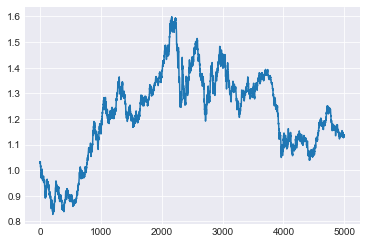

In [16]:
X=eur_usd.as_matrix(columns=['Price'])
price=np.reshape(X,5000)

plt.plot(price)


# Test Data

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


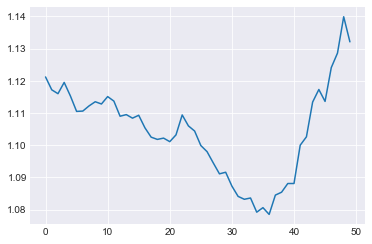

In [17]:
X=eur_usdt.as_matrix(columns=['Price'])
price=np.reshape(X,50)

plt.plot(price)


# Applying Augmented Dickey fuller test to EUR_USD data

In [18]:
from statsmodels.tsa.stattools import adfuller
X = eur_usd['Price'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.741465
p-value: 0.409885
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


the time series is not stationary hence we will aplly arima 

# KPSS

In [19]:
from statsmodels.tsa.stattools import kpss
print ('Results of KPSS Test:')
kpsstest = kpss(X,nlags=5, regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic           22.862243
p-value                   0.010000
Lags Used                 5.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [20]:
def differencing(series):
    dif=np.zeros(5000)
    for i in range(1,len(series)):
        dif[i]=series[i]-series[i-1]
    return dif

# Plotting Auto correlation fuction of the time series

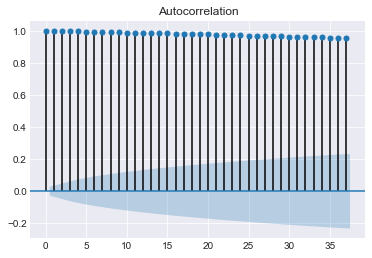

In [21]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(eur_usd['Price'])
pyplot.show()

# Plotting partial auto correlation fuction of the time series

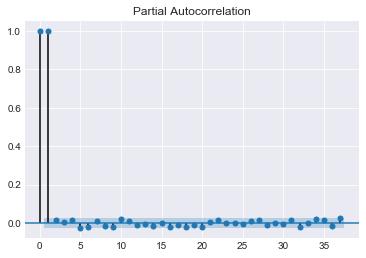

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(eur_usd['Price'])
pyplot.show()

# Plotting Auto correlation fuction of the time series 1st diff

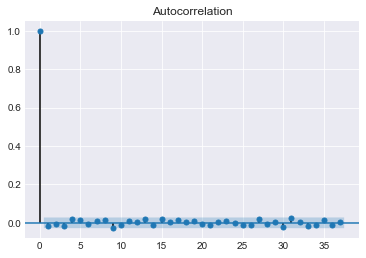

In [23]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

newx=differencing(eur_usd['Price'])
plot_acf(newx)
pyplot.show()

# Plotting partial auto correlation fuction of the time series

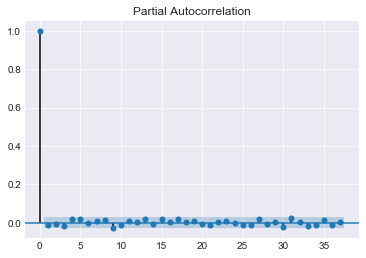

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(newx)
pyplot.show()

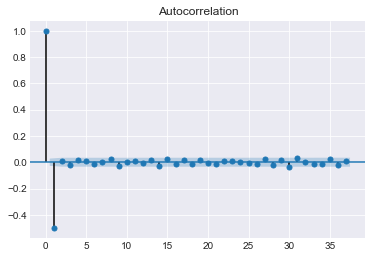

In [25]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

new2=differencing(newx)
plot_acf(new2)
pyplot.show()

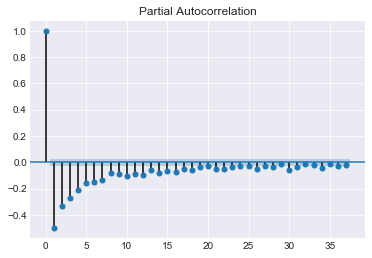

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new2)
pyplot.show()

### These plots show that an ARIMA(2) model (auto regressive model with 2 lags) is appropriate for this series

In [27]:

# endo=pd.concat([eur_usd,eur_usdt])

endo=eur_usd['Price']

In [28]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
model = ARIMA(endo, order=(2,2,2))
result = model.fit(disp=0)
print(result.summary())

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Price   No. Observations:                 4998
Model:                 ARIMA(2, 2, 2)   Log Likelihood               17329.617
Method:                       css-mle   S.D. of innovations              0.008
Date:                Sat, 21 Mar 2020   AIC                         -34647.234
Time:                        16:50:14   BIC                         -34608.133
Sample:                             2   HQIC                        -34633.529
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.519e-08   7.29e-08     -0.894      0.371   -2.08e-07    7.78e-08
ar.L1.D2.Price    -0.9466        nan        nan        nan         nan         nan
ar.L2.D2.Price    -0.0139      0.013

C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [55]:
forecast = result.forecast(steps=50)[0]

eur_usdt['ar']=forecast
history=eur_usd["Price"].to_numpy()
for i in range(0,2):
    model = ARIMA(history, order=(4,2,4))
    result = model.fit(disp=0)
    forecast = result.forecast()[0]
    eur_usdt['ar'].iloc[i]=forecast
    print( eur_usdt["Price"].iloc[i]," ",eur_usdt['ar'].iloc[i]," ",forecast[0])
    np.append(history, eur_usdt["Price"].iloc[i])


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1.1212   1.1376065807940625   1.1376065807940625
1.1172   1.1376065807940625   1.1376065807940625


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [48]:
eur_usdt

,Date,Price,Open,High,Low,Change %,days,ar
0,1/1/2020,1.1212,1.1214,1.1224,1.1206,0.00%,1,1.13754
1,1/2/2020,1.1172,1.1212,1.1227,1.1164,-0.36%,2,1.13754
2,1/3/2020,1.1160,1.1172,1.1182,1.1125,-0.11%,3,1.13754
3,1/6/2020,1.1195,1.1168,1.1208,1.1155,0.31%,4,1.13754
4,1/7/2020,1.1153,1.1198,1.1199,1.1133,-0.38%,5,1.13754
5,1/8/2020,1.1105,1.1154,1.1170,1.1102,-0.43%,6,1.13754
6,1/9/2020,1.1106,1.1105,1.1121,1.1092,0.01%,7,1.13754
7,1/10/2020,1.1122,1.1106,1.1131,1.1085,0.14%,8,1.13754
8,1/13/2020,1.1135,1.1125,1.1148,1.1113,0.12%,9,1.13754
9,1/14/2020,1.1128,1.1135,1.1145,1.1103,-0.06%,10,1.13754


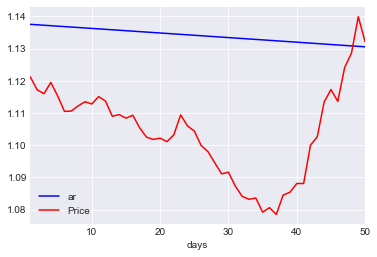

In [30]:
ax = plt.gca()

eur_usdt.plot(kind='line',y='ar',x='days',color='blue',ax=ax)
eur_usdt.plot(kind='line',y='Price',x='days', color='red', ax=ax)

plt.show()

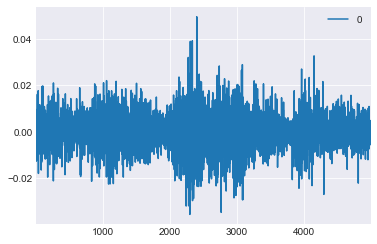

In [32]:
residuals = pd.DataFrame(result.resid)
residuals.plot()
pyplot.show()


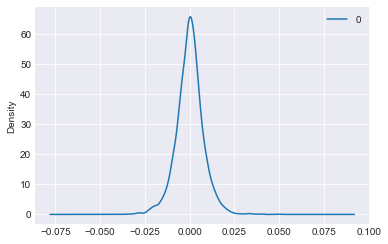

                 0
count  4998.000000
mean      0.000085
std       0.007548
min      -0.035478
25%      -0.004199
50%       0.000122
75%       0.004220
max       0.049549


In [33]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [34]:
sm.stats.acorr_ljungbox(residuals, lags=[2],model_df=3, return_df=True)

,lb_stat,lb_pvalue
2,0.26477,NaN
